In [0]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [0]:
# Load Dataset from GDrive

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


# Download a file based on its file ID.
#Data
file_id_1 = '1f3oSg2ltHlKG2C35GqwQf08WwrN2-bXb'
downloaded_1 = drive.CreateFile({'id': file_id_1})
downloaded_1.GetContentFile('FinalDataset_v5.csv')


# Master Data
file_id_2 = '1lgxyrMEtZXeXdOaFBs1OqCJnwdSxDV_j'
downloaded_2 = drive.CreateFile({'id': file_id_2})
downloaded_2.GetContentFile('FinalDataset_v6.csv')



     |████████████████████████████████| 993kB 6.4MB/s 


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = pd.read_csv('FinalDataset_v6.csv')
drop =['movies_seen']

data = data.drop(drop, axis=1)

data.head()

,year,isAdult,startYear,runtimeMinutes,numVotes,averageRating,Drama,Comedy,Romance,Action,Crime,Thriller,Horror,Adventure,Mystery,Animation,Short,Family,NonFiction,Music,Misc,Fantasy_SciFi,hist_rating,drama_count,comedy_count,romance_count,action_count,crime_count,thriller_count,horror_count,adventure_count,mystery_count,animation_count,short_count,family_count,drama_rating1,comedy_rating1,romance_rating1,action_rating1,crime_rating1,thriller_rating1,horror_rating1,adventure_rating1,mystery_rating1,animation_rating1,short_rating1,family_rating1,user_rating_year,user_rating_month,user_rating_dayofweek,user_rating_weekend_flag,movie_flag,Top100Actor,Target_gt4_rating,ID,cluster
0,1989.0,0,1989.0,124.0,41406.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2004,9,Monday,0,1,0,1,6,1
1,1981.0,0,1981.0,99.0,1034.0,4.4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005,5,Sunday,1,1,0,0,6,1
2,1988.0,0,1988.0,128.0,79961.0,7.8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005,1,Wednesday,0,1,1,1,7,0
3,1980.0,0,1980.0,150.0,10236.0,8.1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005,1,Wednesday,0,1,0,1,7,0
4,1997.0,0,1997.0,93.0,1635.0,6.1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005,1,Wednesday,0,1,0,1,7,0


In [0]:
data.shape

(697138, 56)

In [0]:
# Interaction

list(data)

['year',
 'isAdult',
 'startYear',
 'runtimeMinutes',
 'numVotes',
 'averageRating',
 'Drama',
 'Comedy',
 'Romance',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Adventure',
 'Mystery',
 'Animation',
 'Short',
 'Family',
 'NonFiction',
 'Music',
 'Misc',
 'Fantasy_SciFi',
 'hist_rating',
 'drama_count',
 'comedy_count',
 'romance_count',
 'action_count',
 'crime_count',
 'thriller_count',
 'horror_count',
 'adventure_count',
 'mystery_count',
 'animation_count',
 'short_count',
 'family_count',
 'drama_rating1',
 'comedy_rating1',
 'romance_rating1',
 'action_rating1',
 'crime_rating1',
 'thriller_rating1',
 'horror_rating1',
 'adventure_rating1',
 'mystery_rating1',
 'animation_rating1',
 'short_rating1',
 'family_rating1',
 'user_rating_year',
 'user_rating_month',
 'user_rating_dayofweek',
 'user_rating_weekend_flag',
 'movie_flag',
 'Top100Actor',
 'Target_gt4_rating',
 'ID',
 'cluster']

In [0]:
data_int1 = data.iloc[:, 23:47]
data_int1.head()

,drama_count,comedy_count,romance_count,action_count,crime_count,thriller_count,horror_count,adventure_count,mystery_count,animation_count,short_count,family_count,drama_rating1,comedy_rating1,romance_rating1,action_rating1,crime_rating1,thriller_rating1,horror_rating1,adventure_rating1,mystery_rating1,animation_rating1,short_rating1,family_rating1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
data_int2 = data.drop([ 'drama_count', 'comedy_count', 'romance_count', 'action_count', 'crime_count', 'thriller_count', 'horror_count', 'adventure_count', 'mystery_count', 'animation_count',\
                        'short_count', 'family_count', 'drama_rating1', 'comedy_rating1', 'romance_rating1', 'action_rating1', 'crime_rating1', 'thriller_rating1', 'horror_rating1', \
                        'adventure_rating1', 'mystery_rating1', 'animation_rating1', 'short_rating1', 'family_rating1'] , axis='columns', inplace=True)
data.head()

,year,isAdult,startYear,runtimeMinutes,numVotes,averageRating,Drama,Comedy,Romance,Action,Crime,Thriller,Horror,Adventure,Mystery,Animation,Short,Family,NonFiction,Music,Misc,Fantasy_SciFi,hist_rating,user_rating_year,user_rating_month,user_rating_dayofweek,user_rating_weekend_flag,movie_flag,Top100Actor,Target_gt4_rating,ID,cluster
0,1989.0,0,1989.0,124.0,41406.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2004,9,Monday,0,1,0,1,6,1
1,1981.0,0,1981.0,99.0,1034.0,4.4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2005,5,Sunday,1,1,0,0,6,1
2,1988.0,0,1988.0,128.0,79961.0,7.8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2005,1,Wednesday,0,1,1,1,7,0
3,1980.0,0,1980.0,150.0,10236.0,8.1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2005,1,Wednesday,0,1,0,1,7,0
4,1997.0,0,1997.0,93.0,1635.0,6.1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2005,1,Wednesday,0,1,0,1,7,0


In [0]:
data[ 'drama_rating'] = data_int1[ 'drama_count'] * data_int1[ 'drama_rating1'] 
data[ 'comedy_rating'] = data_int1[ 'comedy_count'] * data_int1[ 'comedy_rating1'] 
data[ 'romance_rating'] = data_int1[ 'romance_count'] * data_int1[ 'romance_rating1'] 
data[ 'action_rating'] = data_int1[ 'action_count'] * data_int1[ 'action_rating1'] 
data[ 'crime_rating'] = data_int1[ 'crime_count'] * data_int1[ 'crime_rating1'] 
data[ 'thriller_rating'] = data_int1[ 'thriller_count'] * data_int1[ 'thriller_rating1'] 
data[ 'horror_rating'] = data_int1[ 'horror_count'] * data_int1[ 'horror_rating1'] 
data[ 'adventure_rating'] = data_int1[ 'adventure_count'] * data_int1[ 'adventure_rating1'] 
data[ 'mystery_rating'] = data_int1[ 'mystery_count'] * data_int1[ 'mystery_rating1'] 
data[ 'animation_rating'] = data_int1[ 'animation_count'] * data_int1[ 'animation_rating1'] 
data[ 'short_rating'] = data_int1[ 'short_count'] * data_int1[ 'short_rating1'] 
data[ 'family_rating'] = data_int1[ 'family_count'] * data_int1[ 'family_rating1'] 


In [0]:
data1 = data
data1.drop(['user_rating_year', 'user_rating_month', 'user_rating_dayofweek'], axis = 'columns', inplace = True)
data1.head()

target = data1['Target_gt4_rating']

data1 = data1.drop(['Target_gt4_rating'], axis = 1)

data1 = pd.concat([data1, target], axis = 1)


data1.head()

,year,isAdult,startYear,runtimeMinutes,numVotes,averageRating,Drama,Comedy,Romance,Action,Crime,Thriller,Horror,Adventure,Mystery,Animation,Short,Family,NonFiction,Music,Misc,Fantasy_SciFi,hist_rating,user_rating_weekend_flag,movie_flag,Top100Actor,ID,cluster,drama_rating,comedy_rating,romance_rating,action_rating,crime_rating,thriller_rating,horror_rating,adventure_rating,mystery_rating,animation_rating,short_rating,family_rating,Target_gt4_rating
0,1989.0,0,1989.0,124.0,41406.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1981.0,0,1981.0,99.0,1034.0,4.4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1,1,0,6,1,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1988.0,0,1988.0,128.0,79961.0,7.8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,7,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1980.0,0,1980.0,150.0,10236.0,8.1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0,1,0,7,0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1997.0,0,1997.0,93.0,1635.0,6.1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0,1,0,7,0,10.0,5.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [0]:
data1.cluster.unique()

array([1, 0, 2, 3])

In [0]:
! apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
openjdk version "11.0.4" 2019-07-16
OpenJDK Runtime Environment (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3)
OpenJDK 64-Bit Server VM (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3, mixed mode, sharing)


In [0]:
! pip install h2o
import h2o
import os
# Start up a 1-node H2O cloud on your local machine, and allow it to use all CPU cores and up to 2GB of memory:


h2o.init(max_mem_size = "8G")             #specify max number of bytes. uses all cores by default.
h2o.remove_all()                          #clean slate, in case cluster was already running

     |████████████████████████████████| 123.6MB 74.0MB/s 
  Created wheel for h2o: filename=h2o-3.26.0.3-py2.py3-none-any.whl size=123649955 sha256=e65a40dc785f5be85f4348dfd835a85185f77901187500e5e63d95cc49416915
  Stored in directory: /root/.cache/pip/wheels/4a/a6/8d/0880c51d5aa9746a87f61d9b66d8a98e7b9cf400c81ffc944e
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.4" 2019-07-16; OpenJDK Runtime Environment (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3); OpenJDK 64-Bit Server VM (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpsqufrh9w
  JVM stdout: /tmp/tmpsqufrh9w/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpsqufrh9w/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321

H2O cluster uptime:,01 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.3
H2O cluster version age:,5 days
H2O cluster name:,H2O_from_python_unknownUser_nwgytc
H2O cluster total nodes:,1
H2O cluster free memory:,8 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [0]:
frame = h2o.H2OFrame(data1)

NameError: ignored

In [0]:
frame.head()

year,isAdult,startYear,runtimeMinutes,numVotes,averageRating,Drama,Comedy,Romance,Action,Crime,Thriller,Horror,Adventure,Mystery,Animation,Short,Family,NonFiction,Music,Misc,Fantasy_SciFi,hist_rating,user_rating_weekend_flag,movie_flag,Top100Actor,ID,cluster,drama_rating,comedy_rating,romance_rating,action_rating,crime_rating,thriller_rating,horror_rating,adventure_rating,mystery_rating,animation_rating,short_rating,family_rating,Target_gt4_rating
1989,0,1989,124,41406,7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1981,0,1981,99,1034,4.4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4,1,1,0,6,1,4,4,0,0,0,0,0,0,0,0,0,0,0
1988,0,1988,128,79961,7.8,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1980,0,1980,150,10236,8.1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1,0,7,0,5,0,0,0,5,0,0,0,0,0,0,0,1
1997,0,1997,93,1635,6.1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1,0,7,0,10,5,5,0,5,0,0,0,0,0,0,0,1
1994,0,1994,89,2803,6.6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,0,1,0,7,0,15,5,10,0,5,0,0,0,0,0,0,0,1
1998,0,1998,100,11755,7.3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.75,0,1,0,7,0,19,5,10,0,5,4,0,0,0,0,0,0,0
1939,0,1939,237,708,6.9,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,4.4,0,1,0,7,0,22,8,10,0,5,4,0,0,0,0,0,0,1
2004,0,2004,90,10,6.2,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2004,0,2004,137,623690,8,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,3,0,1,0,10,1,3,0,0,3,3,0,0,0,0,0,0,0,0


In [0]:
frame['Target_gt4_rating'] = frame['Target_gt4_rating'].asfactor()

In [0]:
frame['Action'] = frame['Action'].asfactor()
frame['Adventure'] = frame['Adventure'].asfactor()
frame['Animation'] = frame['Animation'].asfactor()
frame['Comedy'] = frame['Comedy'].asfactor()
frame['Crime'] = frame['Crime'].asfactor()
frame['Drama'] = frame['Drama'].asfactor()
frame['Family'] = frame['Family'].asfactor()
frame['Fantasy_SciFi'] = frame['Fantasy_SciFi'].asfactor()
frame['Horror'] = frame['Horror'].asfactor()
frame['Misc'] = frame['Misc'].asfactor()
frame['Music'] = frame['Music'].asfactor()
frame['Mystery'] = frame['Mystery'].asfactor()
frame['NonFiction'] = frame['NonFiction'].asfactor()
frame['Romance'] = frame['Romance'].asfactor()
frame['Short'] = frame['Short'].asfactor()
frame['Thriller'] = frame['Thriller'].asfactor()
frame['cluster'] = frame['cluster'].asfactor()
frame['isAdult'] = frame['isAdult'].asfactor()
frame['movie_flag'] = frame['movie_flag'].asfactor()

In [0]:
frame.head()

year,isAdult,startYear,runtimeMinutes,numVotes,averageRating,Drama,Comedy,Romance,Action,Crime,Thriller,Horror,Adventure,Mystery,Animation,Short,Family,NonFiction,Music,Misc,Fantasy_SciFi,hist_rating,user_rating_weekend_flag,movie_flag,Top100Actor,ID,cluster,drama_rating,comedy_rating,romance_rating,action_rating,crime_rating,thriller_rating,horror_rating,adventure_rating,mystery_rating,animation_rating,short_rating,family_rating,Target_gt4_rating
1989,0,1989,124,41406,7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1981,0,1981,99,1034,4.4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4,1,1,0,6,1,4,4,0,0,0,0,0,0,0,0,0,0,0
1988,0,1988,128,79961,7.8,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1980,0,1980,150,10236,8.1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1,0,7,0,5,0,0,0,5,0,0,0,0,0,0,0,1
1997,0,1997,93,1635,6.1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1,0,7,0,10,5,5,0,5,0,0,0,0,0,0,0,1
1994,0,1994,89,2803,6.6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,0,1,0,7,0,15,5,10,0,5,0,0,0,0,0,0,0,1
1998,0,1998,100,11755,7.3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.75,0,1,0,7,0,19,5,10,0,5,4,0,0,0,0,0,0,0
1939,0,1939,237,708,6.9,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,4.4,0,1,0,7,0,22,8,10,0,5,4,0,0,0,0,0,0,1
2004,0,2004,90,10,6.2,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2004,0,2004,137,623690,8,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,3,0,1,0,10,1,3,0,0,3,3,0,0,0,0,0,0,0,0


In [0]:
# Remove ID column

id = frame['ID']
id.head()

frame = frame.drop(['ID'])

In [0]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator


train, valid, test = frame.split_frame([0.6, 0.2], seed=1234)

#Prepare predictors and response columns
covtype_X = frame.col_names[:-1]     #last column is Cover_Type, our desired response variable 
covtype_y = frame.col_names[-1]   

In [0]:
#### Do not RUN, instead load models below. ####


from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

# Use same data as above

# GBM hyperparameters
gbm_params2 = {'learn_rate': [i * 0.01 for i in range(1, 11)],
                'max_depth': list(range(2, 11)),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                'col_sample_rate': [i * 0.1 for i in range(1, 11)]}

# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 20, 'seed': 1}

# Train and validate a random grid of GBMs
gbm_grid = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid',
                          hyper_params=gbm_params2,
                          search_criteria=search_criteria)


In [0]:
gbm_grid.train(x=covtype_X, y=covtype_y,
                training_frame=train,
                validation_frame=valid,
                ntrees=10,
                seed=1, nfolds = 5)




gbm Grid Build progress: |████ (cancelled)


H2OJobCancelled: ignored

In [0]:
gbm_grid

In [0]:
# Get the grid results, sorted by validation AUC
gbm_gridperf2 = gbm_grid.get_grid(sort_by='auc', decreasing=True)
gbm_gridperf2

# Grab the top GBM model, chosen by validation AUC
best_gbm2 = gbm_gridperf2.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_gbm_perf2 = best_gbm2.model_performance(test)

best_gbm_perf2.auc()


In [0]:
gbm_gridperf2



In [0]:
best_gbm2 = h2o.load_model("/content/drive/My Drive/DataMiningFinal/GBM Models/gbm_Combined")

Gradient Boosting Machine(using internal 5-fold cross-validation and GridSearchCV)

Cross-Validation Metrics Summary: 

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.61831236,0.0027347554,0.6201415,0.62175494,0.61564976,0.6184611,0.61555433
1,auc,0.6779917,0.0010527285,0.67677826,0.6786138,0.67789364,0.67941487,0.67725784
2,err,0.38168767,0.0027347554,0.37985846,0.37824503,0.3843502,0.38153893,0.38444567
3,err_count,31964.4,253.86177,31831.0,31661.0,32222.0,31873.0,32235.0
4,f0point5,0.6517105,0.0017140304,0.6533442,0.6534718,0.64977455,0.651745,0.6502168
5,f1,0.7359684,3.9363708E-4,0.73632157,0.7359845,0.7352994,0.7361528,0.7360837
6,f2,0.8452592,0.0023529953,0.8434421,0.84234595,0.84675086,0.8456769,0.8480802
7,lift_top_group,1.4670974,0.022216106,1.5019388,1.4595329,1.4636308,1.4694679,1.4409165
8,logloss,0.6623231,3.2108853E-4,0.66258156,0.66240287,0.6620846,0.66264564,0.6619008
9,max_per_class_error,0.80057424,0.013731222,0.7922903,0.7823612,0.8111613,0.80093986,0.8161186



Gradient Boosting Machine(using internal 5-fold cross-validation and GridSearchCV)
                           0             1         2         3
0                hist_rating  15232.178711  1.000000  0.272215
1              averageRating   6578.060547  0.431853  0.117557
2             runtimeMinutes   4551.534180  0.298810  0.081341
3                   numVotes   3972.378662  0.260789  0.070991
4                  startYear   3422.167725  0.224667  0.061158
5                       year   3098.302002  0.203405  0.055370
6                    Romance   2150.952393  0.141211  0.038440
7              comedy_rating   1858.321777  0.122000  0.033210
8               drama_rating   1824.904663  0.119806  0.032613
9                     Comedy   1050.208984  0.068947  0.018768
10           thriller_rating    803.411865  0.052744  0.014358
11                movie_flag    798.790161  0.052441  0.014275
12                  Thriller    790.350281  0.051887  0.014124
13                    Action    75

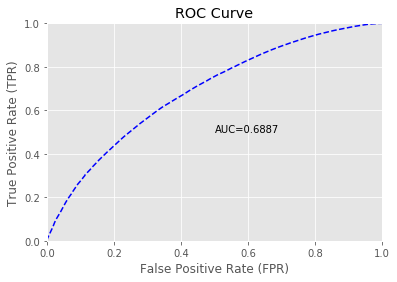

In [0]:
print("Gradient Boosting Machine(using internal 5-fold cross-validation and GridSearchCV)")
print (best_gbm2.cross_validation_metrics_summary())

print("Gradient Boosting Machine(using internal 5-fold cross-validation and GridSearchCV)")
print(pd.DataFrame(best_gbm2.varimp()))

print("Gradient Boosting Machine(using internal 5-fold cross-validation and GridSearchCV)")
best_gbm2.confusion_matrix(valid=True)

performace_clus0 = best_gbm2.model_performance(train=True)
performace_clus0.plot()

In [0]:
print("Gradient Boosting Machine(using internal 5-fold cross-validation and GridSearchCV)")
best_gbm2.confusion_matrix(valid=True)

Gradient Boosting Machine(using internal 5-fold cross-validation and GridSearchCV)

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5206804397684711: 

,,0,1,Error,Rate
0,0,11696.0,48557.0,0.8059,(48557.0/60253.0)
1,1,4860.0,74114.0,0.0615,(4860.0/78974.0)
2,Total,16556.0,122671.0,0.3837,(53417.0/139227.0)


In [0]:
#### Do Not RUN, Load models instead ####

from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch


# GBM hyperparameters
gbm_params2 = {'learn_rate': [i * 0.01 for i in range(1, 11)],
                'max_depth': list(range(2, 11)),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                'col_sample_rate': [i * 0.1 for i in range(1, 11)]}

# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 20, 'seed': 1}

grid = []
iter = ['0', '1', '2', '3']
for i in range(0,4):
  
    j = iter[i]
    frame1 = frame[frame["cluster"] == j]
    frame1.drop([26])
    print(frame1.head())
    train, valid, test = frame1.split_frame([0.6, 0.2], seed=1234)

    #Prepare predictors and response columns
    covtype_X = frame1.col_names[:-1]     #last column is Cover_Type, our desired response variable 
    covtype_y = frame1.col_names[-1]   

    if i == 0:
      # Train and validate a random grid of GBMs
      gbm_grid0 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                                grid_id='gbm_grid0',
                                hyper_params=gbm_params2,
                                search_criteria=search_criteria)
      gbm_grid0.train(x=covtype_X, y=covtype_y,
                              training_frame=train,
                              validation_frame=valid,
                              ntrees=10,
                              seed=1, nfolds = 5)

      # Get the grid results, sorted by validation AUC
      gbm_gridperf0 = gbm_grid0.get_grid(sort_by='auc', decreasing=True)

      grid.append(gbm_gridperf0)
                                
    elif i == 1:
      # Train and validate a random grid of GBMs
      gbm_grid1 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                                grid_id='gbm_grid1',
                                hyper_params=gbm_params2,
                                search_criteria=search_criteria)
      # Use same data as above
      gbm_grid1.train(x=covtype_X, y=covtype_y,
                              training_frame=train,
                              validation_frame=valid,
                              ntrees=10,
                              seed=1, nfolds = 5)

      # Get the grid results, sorted by validation AUC
      gbm_gridperf1 = gbm_grid1.get_grid(sort_by='auc', decreasing=True)

      grid.append(gbm_gridperf1)
      
    elif i == 2:
      # Train and validate a random grid of GBMs
      gbm_grid2 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                                grid_id='gbm_grid2',
                                hyper_params=gbm_params2,
                                search_criteria=search_criteria)
      # Use same data as above
      gbm_grid2.train(x=covtype_X, y=covtype_y,
                              training_frame=train,
                              validation_frame=valid,
                              ntrees=10,
                              seed=1, nfolds = 5)

      # Get the grid results, sorted by validation AUC
      gbm_gridperf2 = gbm_grid2.get_grid(sort_by='auc', decreasing=True)

      grid.append(gbm_gridperf2)
      
    elif i == 3:
      # Train and validate a random grid of GBMs
      gbm_grid3 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                                grid_id='gbm_grid3',
                                hyper_params=gbm_params2,
                                search_criteria=search_criteria)
      # Use same data as above
      gbm_grid3.train(x=covtype_X, y=covtype_y,
                              training_frame=train,
                              validation_frame=valid,
                              ntrees=10,
                              seed=1, nfolds = 5)

      # Get the grid results, sorted by validation AUC
      gbm_gridperf3 = gbm_grid3.get_grid(sort_by='auc', decreasing=True)

      grid.append(gbm_gridperf3)
      
      

In [0]:
gbm_gridperf0 = grid[0].get_grid(sort_by='auc', decreasing=True).models[0]
gbm_gridperf1 = grid[1].get_grid(sort_by='auc', decreasing=True).models[0]
gbm_gridperf2 = grid[2].get_grid(sort_by='auc', decreasing=True).models[0]
gbm_gridperf3 = grid[3].get_grid(sort_by='auc', decreasing=True).models[0]

In [0]:
gbm_gridperf0 = h2o.load_model("/content/drive/My Drive/DataMiningFinal/GBM Models/gbm_cluster1")
gbm_gridperf1 = h2o.load_model("/content/drive/My Drive/DataMiningFinal/GBM Models/gbm_cluster2")
gbm_gridperf2 = h2o.load_model("/content/drive/My Drive/DataMiningFinal/GBM Models/gbm_cluster3")
gbm_gridperf3 = h2o.load_model("/content/drive/My Drive/DataMiningFinal/GBM Models/gbm_cluster4")

In [0]:
gbm_gridperf0.params

{'balance_classes': {'actual': False, 'default': False},
 'build_tree_one_node': {'actual': False, 'default': False},
 'calibrate_model': {'actual': False, 'default': False},
 'calibration_frame': {'actual': None, 'default': None},
 'categorical_encoding': {'actual': 'AUTO', 'default': 'AUTO'},
 'check_constant_response': {'actual': True, 'default': True},
 'checkpoint': {'actual': None, 'default': None},
 'class_sampling_factors': {'actual': None, 'default': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0},
 'col_sample_rate_change_per_level': {'actual': 1.0, 'default': 1.0},
 'col_sample_rate_per_tree': {'actual': 1.0, 'default': 1.0},
 'custom_distribution_func': {'actual': None, 'default': None},
 'custom_metric_func': {'actual': None, 'default': None},
 'distribution': {'actual': 'bernoulli', 'default': 'AUTO'},
 'export_checkpoints_dir': {'actual': None, 'default': None},
 'fold_assignment': {'actual': 'AUTO', 'default': 'AUTO'},
 'fold_column': {'actual': None, 'defaul

In [0]:
print("Cluster - 1: Gradient Boosting Machine(using internal 5-fold cross-validation and GridSearchCV)")
print (gbm_gridperf0.cross_validation_metrics_summary())

Cluster - 1: Gradient Boosting Machine(using internal 5-fold cross-validation and GridSearchCV)

Cross-Validation Metrics Summary: 

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.6084628,0.007486872,0.6118314,0.615091,0.6036501,0.5977365,0.61400497
1,auc,0.681158,0.0043316465,0.6829515,0.68539935,0.6762954,0.6767304,0.6844135
2,err,0.39153722,0.007486872,0.3881686,0.38490897,0.3963499,0.40226355,0.38599506
3,err_count,18277.0,361.44363,18143.0,17951.0,18590.0,18731.0,17970.0
4,f0point5,0.64143646,0.004725542,0.64384365,0.64523745,0.63979185,0.63386494,0.6444446
5,f1,0.727425,0.0021783472,0.7273083,0.7283074,0.72999275,0.72402054,0.727496
6,f2,0.8401121,0.0065585105,0.83563584,0.8359275,0.84980184,0.84407467,0.83512056
7,lift_top_group,1.5331644,0.029830806,1.5433235,1.5684272,1.4891742,1.5442102,1.520687
8,logloss,0.656831,5.7640334E-4,0.6569095,0.65636665,0.65676355,0.65776473,0.6563506
9,max_per_class_error,0.8056505,0.03499119,0.7869416,0.77641374,0.8452375,0.8421613,0.7774982


In [0]:
print("Cluster - 2: Gradient Boosting Machine(using internal 5-fold cross-validation and GridSearchCV)")
print (gbm_gridperf1.cross_validation_metrics_summary())

In [0]:
print("Cluster - 3: Gradient Boosting Machine(using internal 5-fold cross-validation and GridSearchCV)")
print (gbm_gridperf2.cross_validation_metrics_summary())

In [0]:
print("Cluster - 4: Gradient Boosting Machine(using internal 5-fold cross-validation and GridSearchCV)")
print (gbm_gridperf3.cross_validation_metrics_summary())

In [0]:
print("Cluster - 1: Gradient Boosting Machine(using internal 5-fold cross-validation and GridSearchCV)")
print(pd.DataFrame(gbm_gridperf0.varimp()))

In [0]:
print("Cluster - 2: Gradient Boosting Machine(using internal 5-fold cross-validation and GridSearchCV)")
print(pd.DataFrame(gbm_gridperf1.varimp()))

In [0]:
print("Cluster - 3: Gradient Boosting Machine(using internal 5-fold cross-validation and GridSearchCV)")
print(pd.DataFrame(gbm_gridperf2.varimp()))

In [0]:
print("Cluster - 4: Gradient Boosting Machine(using internal 5-fold cross-validation and GridSearchCV)")
print(pd.DataFrame(gbm_gridperf3.varimp()))

In [0]:
print("Cluster - 1: Gradient Boosting Machine(using internal 5-fold cross-validation and GridSearchCV)")
gbm_gridperf0.confusion_matrix(valid=True)

In [0]:
print("Cluster - 2: Gradient Boosting Machine(using internal 5-fold cross-validation and GridSearchCV)")
gbm_gridperf1.confusion_matrix(valid=True)

In [0]:
print("Cluster - 3: Gradient Boosting Machine(using internal 5-fold cross-validation and GridSearchCV)")
gbm_gridperf2.confusion_matrix(valid=True)

In [0]:
print("Cluster - 4: Gradient Boosting Machine(using internal 5-fold cross-validation and GridSearchCV)")
gbm_gridperf3.confusion_matrix(valid=True)

In [0]:
performace_clus0 = gbm_gridperf0.model_performance(train=True)
performace_clus0.plot()



In [0]:
performace_clus1 = gbm_gridperf1.model_performance(train=True)
performace_clus1.plot()


In [0]:

performace_clus2 = gbm_gridperf2.model_performance(train=True)
performace_clus2.plot()


In [0]:

performace_clus3 = gbm_gridperf3.model_performance(train=True)
performace_clus3.plot()

In [0]:
## Save Models

model_path = h2o.save_model(model=best_gbm2, path="/tmp/gbm_comb", force=True)
model_path = h2o.save_model(model=gbm_gridperf0, path="/tmp/gbm_clus1", force=True)
model_path = h2o.save_model(model=gbm_gridperf1, path="/tmp/gbm_clus2", force=True)
model_path = h2o.save_model(model=gbm_gridperf2, path="/tmp/gbm_clus3", force=True)
model_path = h2o.save_model(model=gbm_gridperf3, path="/tmp/gbm_clus4", force=True)


In [0]:
# QDA
import pandas as pd
import numpy as np

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score

%matplotlib inline


In [0]:
data_qda = frame.as_data_frame(use_pandas = True)
data_qda = data_qda.drop(['startYear', 'year'], axis = 1)
data_qda['Target_gt4_rating'] = data_qda['Target_gt4_rating'].astype('category')
data_qda['Action'] = data_qda['Action'].astype('category')
data_qda['Adventure'] = data_qda['Adventure'].astype('category')
data_qda['Animation'] = data_qda['Animation'].astype('category')
data_qda['Comedy'] = data_qda['Comedy'].astype('category')
data_qda['Crime'] = data_qda['Crime'].astype('category')
data_qda['Drama'] = data_qda['Drama'].astype('category')
data_qda['Family'] = data_qda['Family'].astype('category')
data_qda['Fantasy_SciFi'] = data_qda['Fantasy_SciFi'].astype('category')
data_qda['Horror'] = data_qda['Horror'].astype('category')
data_qda['Misc'] = data_qda['Misc'].astype('category')
data_qda['Music'] = data_qda['Music'].astype('category')
data_qda['Mystery'] = data_qda['Mystery'].astype('category')
data_qda['NonFiction'] = data_qda['NonFiction'].astype('category')
data_qda['Romance'] = data_qda['Romance'].astype('category')
data_qda['Short'] = data_qda['Short'].astype('category')
data_qda['Thriller'] = data_qda['Thriller'].astype('category')
data_qda['cluster'] = data_qda['cluster'].astype('category')
data_qda['isAdult'] = data_qda['isAdult'].astype('category')
data_qda['movie_flag'] = data_qda['movie_flag'].astype('category')

In [0]:
data_qda = data_qda[data_qda.cluster == 1]
data_qda.head()

,isAdult,runtimeMinutes,numVotes,averageRating,Drama,Comedy,Romance,Action,Crime,Thriller,Horror,Adventure,Mystery,Animation,Short,Family,NonFiction,Music,Misc,Fantasy_SciFi,hist_rating,user_rating_weekend_flag,movie_flag,Top100Actor,cluster,drama_rating,comedy_rating,romance_rating,action_rating,crime_rating,thriller_rating,horror_rating,adventure_rating,mystery_rating,animation_rating,short_rating,family_rating,Target_gt4_rating
0,0,124.0,41406,7.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0,99.0,1034,4.4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.0,1,1,0,1,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,0,90.0,10,6.2,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0.0,1,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0,137.0,623690,8.0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,3.0,0,1,0,1,3.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
22,0,100.0,11755,7.3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [0]:
data_qda = data_qda.drop(['cluster'], axis = 1)

In [0]:
model_X = data_qda.drop(['Target_gt4_rating'], axis = 1)
model_Y = data_qda['Target_gt4_rating']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(model_X, model_Y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(39205, 36) (39205,)
(9802, 36) (9802,)


In [0]:
y_test.head()

361880    0
451565    0
650971    0
579550    0
610979    1
Name: Target_gt4_rating, dtype: category
Categories (2, int64): [0, 1]

In [0]:
qda = QuadraticDiscriminantAnalysis()
model2 = qda.fit(X_train, y_train)

In [0]:
pred2=model2.predict(X_test)

In [0]:
print(np.unique(pred2, return_counts=True))
print(confusion_matrix(pred2, y_test))
print(classification_report(y_test, pred2, digits=3))

(array([0, 1]), array([2213, 7589]))
[[1112 1101]
 [2749 4840]]
              precision    recall  f1-score   support

           0      0.502     0.288     0.366      3861
           1      0.638     0.815     0.715      5941

    accuracy                          0.607      9802
   macro avg      0.570     0.551     0.541      9802
weighted avg      0.584     0.607     0.578      9802



,year,isAdult,startYear,runtimeMinutes,numVotes,averageRating,Drama,Comedy,Romance,Action,Crime,Thriller,Horror,Adventure,Mystery,Animation,Short,Family,NonFiction,Music,Misc,Fantasy_SciFi,hist_rating,user_rating_weekend_flag,movie_flag,Top100Actor,cluster,drama_rating,comedy_rating,romance_rating,action_rating,crime_rating,thriller_rating,horror_rating,adventure_rating,mystery_rating,animation_rating,short_rating,family_rating,Target_gt4_rating
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
10,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
42,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
59,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
79,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
94,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
97,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
131,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [0]:
# Load Dataset from GDrive

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


# Download a file based on its file ID.
#Data
file_id_1 = '1uyhBSHOQF9e3Sm82V0x6BkPFjTBkNYUS'
downloaded_1 = drive.CreateFile({'id': file_id_1})
downloaded_1.GetContentFile('FinalDataset_v3.csv')


#Data
file_id_1 = '184Ey_XcyVVHA5e3WtTltKE5mskGUxuzk'
downloaded_1 = drive.CreateFile({'id': file_id_1})
downloaded_1.GetContentFile('cluster.csv')

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exceptio

In [0]:
data_temp = pd.read_csv('FinalDataset_v3.csv')
cluster = pd.read_csv('cluster.csv')

In [0]:
x = data_temp.sort_values(by = 'averageRating', ascending = False)
x = x[x.movie_flag == 1]
x

,customer_id,movie_id,primaryTitle,year,date,titleType,isAdult,startYear,runtimeMinutes,directors,writers,"('primaryName', 'actor')","('primaryName', 'actress')",numVotes,averageRating,Drama,Comedy,Romance,Action,Crime,Thriller,Horror,Adventure,Mystery,Animation,Short,Family,NonFiction,Music,Misc,Fantasy_SciFi,user_rating,drama_rating,comedy_rating,romance_rating,action_rating,crime_rating,thriller_rating,horror_rating,adventure_rating,...,tvSeries,tvShort,tvSpecial,video,videoGame,hist_rating,drama_count,comedy_count,romance_count,action_count,crime_count,thriller_count,horror_count,adventure_count,mystery_count,animation_count,short_count,family_count,rownum,drama_rating_hist,drama_rating1,comedy_rating1,romance_rating1,action_rating1,crime_rating1,thriller_rating1,horror_rating1,adventure_rating1,mystery_rating1,animation_rating1,short_rating1,family_rating1,movies_seen,user_rating_year,user_rating_month,user_rating_dayofweek,user_rating_weekend_flag,movie_flag,Top100Actor,Target_gt4_rating
544262,2067423,872,Seven Samurai,1954.0,2005-01-10,movie,0,1954.0,207.0,nm0000041,"nm0000041,nm0368074,nm0644823","Toshirô Mifune,Takashi Shimura","Keiko Tsushima,Yukiko Shimazaki",287820.0,8.6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,0,0,0,0,0,4.000000,5.0,4.0,2.0,2.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,8,3.599582,3.800000,3.750000,3.500000,4.000000,5.000000,NaN,5.000000,NaN,5.0,NaN,NaN,NaN,7.0,2005,1,Monday,0,1,0,0
250167,944501,872,Seven Samurai,1954.0,2004-10-29,movie,0,1954.0,207.0,nm0000041,"nm0000041,nm0368074,nm0644823","Toshirô Mifune,Takashi Shimura","Keiko Tsushima,Yukiko Shimazaki",287820.0,8.6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.597026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2004,10,Friday,0,1,0,1
226949,857778,872,Seven Samurai,1954.0,2004-08-11,movie,0,1954.0,207.0,nm0000041,"nm0000041,nm0368074,nm0644823","Toshirô Mifune,Takashi Shimura","Keiko Tsushima,Yukiko Shimazaki",287820.0,8.6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,0,0,0,0,0,3.333333,5.0,3.0,3.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,10,3.595858,3.000000,3.666667,3.333333,2.666667,2.500000,NaN,NaN,NaN,NaN,NaN,4.0,NaN,9.0,2004,8,Wednesday,0,1,0,1
662037,2515643,872,Seven Samurai,1954.0,2002-05-21,movie,0,1954.0,207.0,nm0000041,"nm0000041,nm0368074,nm0644823","Toshirô Mifune,Takashi Shimura","Keiko Tsushima,Yukiko Shimazaki",287820.0,8.6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,0,0,0,0,0,4.000000,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3.598851,4.000000,4.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2002,5,Tuesday,0,1,0,1
87566,333346,872,Seven Samurai,1954.0,2004-01-04,movie,0,1954.0,207.0,nm0000041,"nm0000041,nm0368074,nm0644823","Toshirô Mifune,Takashi Shimura","Keiko Tsushima,Yukiko Shimazaki",287820.0,8.6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,0,0,0,0,0,3.750000,3.0,1.0,1.0,2.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,5,3.596185,4.333333,2.000000,5.000000,3.500000,3.333333,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,2004,1,Sunday,1,1,0,0
586872,2228846,872,Seven Samurai,1954.0,2002-09-09,movie,0,1954.0,207.0,nm0000041,"nm0000041,nm0368074,nm0644823","Toshirô Mifune,Takashi Shimura","Keiko Tsushima,Yukiko Shimazaki",287820.0,8.6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.599830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2002,9,Monday,0,1,0,0
21164,80751,872,Seven Samurai,1954.0,2002-06-05,movie,0,1954.0,207.0,nm0000041,"nm0000041,nm0368074,nm0644823","Toshirô Mifune,Takashi Shimura","Keiko Tsushima,Yukiko Shimazaki",287820.0,8.6,1.0,NaN,NaN,N

In [0]:
# Test Customers with more than 4 movies history

test_sample = data_temp.groupby('customer_id')['movie_id'].nunique()
test_sample = test_sample.index[test_sample > 4]

test_sample = list(test_sample.drop_duplicates(keep = 'last'))


from random import sample 
test_id = sample(test_sample, 3)

In [0]:
final_cust = pd.merge(data_temp, cluster, how='inner', left_on='customer_id', right_on='ID')

In [0]:
#drop unneeded columns
drop_these_columns = ['rownum','drama_rating_hist','movie',
 'drama_rating',
 'comedy_rating',
 'romance_rating',
 'action_rating',
 'crime_rating',
 'thriller_rating',
 'horror_rating',
 'adventure_rating',
 'mystery_rating',
 'animation_rating',
 'short_rating',
 'family_rating',
 'nonfiction_rating',
 'music_rating',
 'misc_rating',
 'fantasyscifi_rating',
 'short',
 'tvEpisode',
 'tvMiniSeries',
 'tvMovie',
 'tvSeries',
 'tvShort',
 'tvSpecial',
 'video',
 'videoGame',
 'directors',
 'writers',
 "('primaryName', 'actor')",
 "('primaryName', 'actress')",
 'titleType','user_rating']

#data = data.drop(drop_these_columns, axis=1)
final_cust = final_cust.drop(drop_these_columns, axis=1)

#data = data.fillna(0)
final_cust = final_cust.fillna(0)

In [0]:
### Load Final Random Forest 50 trees code
rf_mdl = h2o.load_model("/content/drive/My Drive/DataMiningFinal/Final Model/rf_grid2_model_18")

In [52]:
rf_mdl

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_grid2_model_18


Model Summary: 

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,5840532.0,20.0,20.0,20.0,7528.0,10477.0,9274.08




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.2202392658546959
RMSE: 0.4692965649295719
LogLoss: 0.6305682371809419
Mean Per-Class Error: 0.36721225868658636
AUC: 0.6847493111669677
pr_auc: 0.7223166283144894
Gini: 0.3694986223339354

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38749491370202716: 

,,0,1,Error,Rate
0,0,35501.0,145792.0,0.8042,(145792.0/181293.0)
1,1,13720.0,223710.0,0.0578,(13720.0/237430.0)
2,Total,49221.0,369502.0,0.3809,(159512.0/418723.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.387495,0.737183,294.0
1,max f2,0.193538,0.868251,370.0
2,max f0point5,0.547022,0.681502,195.0
3,max accuracy,0.510363,0.644099,219.0
4,max precision,0.979040,1.000000,0.0
5,max recall,0.003835,1.000000,399.0
6,max specificity,0.979040,1.000000,0.0
7,max absolute_mcc,0.547022,0.264323,195.0
8,max min_per_class_accuracy,0.565985,0.631028,182.0
9,max mean_per_class_accuracy,0.565985,0.632788,182.0



Gains/Lift Table: Avg response rate: 56.70 %, avg score: 56.74 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010002,0.837566,1.518905,1.518905,0.861270,0.865338,0.861270,0.865338,0.015192,0.015192,51.890529,51.890529
1,,2,0.020001,0.816859,1.472515,1.495713,0.834965,0.825951,0.848119,0.845647,0.014724,0.029916,47.251486,49.571284
2,,3,0.030001,0.805987,1.459036,1.483488,0.827323,0.810940,0.841188,0.834079,0.014590,0.044506,45.903647,48.348836
3,,4,0.040000,0.797319,1.426183,1.469163,0.808694,0.801569,0.833065,0.825952,0.014261,0.058767,42.618287,46.916284
4,,5,0.050002,0.790174,1.391733,1.453675,0.789160,0.793554,0.824282,0.819472,0.013920,0.072687,39.173329,45.367471
5,,6,0.100002,0.757559,1.381049,1.417362,0.783101,0.774170,0.803692,0.796821,0.069052,0.141739,38.104852,41.736248
6,,7,0.150001,0.731438,1.346428,1.393718,0.763470,0.745228,0.790285,0.779624,0.067321,0.209060,34.642754,39.371788
7,,8,0.200001,0.701537,1.289737,1.367723,0.731324,0.716426,0.775545,0.763824,0.064486,0.273546,28.973674,36.772290
8,,9,0.300000,0.652116,1.221716,1.319054,0.692754,0.674632,0.747948,0.734094,0.122171,0.395717,22.171620,31.905439
9,,10,0.400000,0.610757,1.136933,1.273524,0.644679,0.631810,0.722131,0.708523,0.113692,0.509409,13.693271,27.352424




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.2195993986318101
RMSE: 0.46861433890973725
LogLoss: 0.6292974978941257
Mean Per-Class Error: 0.36331300340909645
AUC: 0.6878986236412046
pr_auc: 0.723532249954748
Gini: 0.37579724728240915

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4059006855572447: 

,,0,1,Error,Rate
0,0,13662.0,46591.0,0.7733,(46591.0/60253.0)
1,1,5466.0,73508.0,0.0692,(5466.0/78974.0)
2,Total,19128.0,120099.0,0.3739,(52057.0/139227.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.405901,0.738503,284.0
1,max f2,0.210446,0.868428,366.0
2,max f0point5,0.551298,0.684666,191.0
3,max accuracy,0.505548,0.647374,223.0
4,max precision,0.968533,1.000000,0.0
5,max recall,0.008671,1.000000,399.0
6,max specificity,0.968533,1.000000,0.0
7,max absolute_mcc,0.557124,0.271450,187.0
8,max min_per_class_accuracy,0.565563,0.634855,181.0
9,max mean_per_class_accuracy,0.562875,0.636687,183.0



Gains/Lift Table: Avg response rate: 56.72 %, avg score: 56.77 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010005,0.831570,1.532612,1.532612,0.869347,0.858327,0.869347,0.858327,0.015334,0.015334,53.261248,53.261248
1,,2,0.020003,0.812434,1.429862,1.481256,0.811063,0.820214,0.840215,0.839277,0.014296,0.029630,42.986171,48.125554
2,,3,0.030009,0.802674,1.404789,1.455761,0.796841,0.807112,0.825754,0.828553,0.014055,0.043685,40.478931,45.576069
3,,4,0.040007,0.794122,1.456458,1.455935,0.826149,0.798106,0.825853,0.820944,0.014562,0.058247,45.645790,45.593493
4,,5,0.050148,0.786782,1.395875,1.443789,0.791785,0.789942,0.818963,0.814674,0.014157,0.072404,39.587470,44.378869
5,,6,0.100002,0.753741,1.391867,1.417904,0.789512,0.770551,0.804281,0.792678,0.069390,0.141794,39.186734,41.790446
6,,7,0.150007,0.728880,1.339556,1.391787,0.759839,0.742657,0.789466,0.776003,0.066984,0.208778,33.955634,39.178717
7,,8,0.200004,0.699915,1.303026,1.369598,0.739118,0.714423,0.776880,0.760609,0.065148,0.273926,30.302598,36.959847
8,,9,0.299999,0.652091,1.227048,1.322084,0.696021,0.673715,0.749928,0.731646,0.122699,0.396624,22.704779,32.208385
9,,10,0.400001,0.610239,1.146175,1.278106,0.650147,0.631634,0.724982,0.706642,0.114620,0.511244,14.617532,27.810593




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.22047717975914013
RMSE: 0.4695499757844101
LogLoss: 0.6311557438594936
Mean Per-Class Error: 0.3666301860301656
AUC: 0.6845515903927174
pr_auc: 0.7215659624226244
Gini: 0.3691031807854348

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40454449889850036: 

,,0,1,Error,Rate
0,0,39026.0,142267.0,0.7847,(142267.0/181293.0)
1,1,15724.0,221706.0,0.0662,(15724.0/237430.0)
2,Total,54750.0,363973.0,0.3773,(157991.0/418723.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.404544,0.737296,286.0
1,max f2,0.209169,0.868252,368.0
2,max f0point5,0.548608,0.681848,192.0
3,max accuracy,0.506589,0.644042,223.0
4,max precision,0.952738,0.933333,0.0
5,max recall,0.005994,1.000000,399.0
6,max specificity,0.952738,0.999994,0.0
7,max absolute_mcc,0.553132,0.265280,189.0
8,max min_per_class_accuracy,0.563922,0.632506,180.0
9,max mean_per_class_accuracy,0.560185,0.633370,183.0



Gains/Lift Table: Avg response rate: 56.70 %, avg score: 56.74 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010002,0.829132,1.518905,1.518905,0.861270,0.853164,0.861270,0.853164,0.015192,0.015192,51.890529,51.890529
1,,2,0.020004,0.811932,1.448161,1.483533,0.821156,0.819458,0.841213,0.836311,0.014484,0.029676,44.816060,48.353294
2,,3,0.030001,0.801611,1.450116,1.472398,0.822265,0.806653,0.834899,0.826428,0.014497,0.044173,45.011641,47.239764
3,,4,0.040000,0.792512,1.427868,1.461266,0.809649,0.796841,0.828587,0.819032,0.014278,0.058451,42.786767,46.126582
4,,5,0.050002,0.785533,1.394260,1.447863,0.790592,0.788980,0.820987,0.813021,0.013945,0.072396,39.425988,44.786271
5,,6,0.100002,0.753086,1.382733,1.415299,0.784056,0.768781,0.802522,0.790901,0.069136,0.141532,38.273324,41.529875
6,,7,0.150001,0.726035,1.341879,1.390826,0.760890,0.740579,0.788645,0.774127,0.067093,0.208626,34.187880,39.082582
7,,8,0.200001,0.695957,1.301614,1.368523,0.738059,0.710880,0.775999,0.758316,0.065080,0.273706,30.161401,36.852314
8,,9,0.300000,0.649516,1.216030,1.317693,0.689530,0.671153,0.747176,0.729262,0.121602,0.395308,21.603028,31.769259
9,,10,0.400000,0.608632,1.139881,1.273240,0.646351,0.629124,0.721970,0.704227,0.113987,0.509295,13.988097,27.323995




Cross-Validation Metrics Summary: 

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
0,accuracy,0.6209712,0.0025892006,0.61810535,0.62314177,0.6216665
1,auc,0.68457824,0.0022382939,0.6864137,0.6852364,0.6820847
2,err,0.3790288,0.0025892006,0.38189465,0.3768582,0.37833354
3,err_count,52904.0,664.1446,53576.0,52248.0,52888.0
4,f0point5,0.6534064,0.0015688741,0.65170175,0.6547898,0.6537276
5,f1,0.7373627,0.0011241846,0.7382578,0.73772925,0.736101
6,f2,0.84609365,0.004701822,0.8513273,0.84472734,0.8422263
7,lift_top_group,1.52194,0.03211843,1.5182755,1.5557334,1.4918109
8,logloss,0.63115615,0.0011887607,0.63013995,0.6308651,0.6324634
9,max_per_class_error,0.7947254,0.018352732,0.8158911,0.78505546,0.7832297



Scoring History: 

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2019-08-26 16:42:48,1:41:50.432,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2019-08-26 16:42:51,1:41:53.621,1.0,0.493371,1.030616,0.630635,0.647628,1.286430,0.415666,0.493697,1.049724,0.629867,0.645490,1.239031,0.414941
2,,2019-08-26 16:42:58,1:42:00.222,3.0,0.486872,0.881750,0.642619,0.664675,1.293773,0.410261,0.476375,0.654777,0.662582,0.699202,1.419976,0.390521
3,,2019-08-26 16:43:08,1:42:10.120,6.0,0.480763,0.735990,0.653056,0.684413,1.349722,0.399520,0.472587,0.638590,0.673292,0.711294,1.493380,0.387231
4,,2019-08-26 16:43:21,1:42:23.515,10.0,0.475826,0.666028,0.664125,0.699633,1.402682,0.394490,0.470915,0.634080,0.679090,0.716324,1.506220,0.385974
5,,2019-08-26 16:43:35,1:42:36.865,14.0,0.473340,0.644741,0.671013,0.708029,1.438896,0.384988,0.470031,0.632210,0.682189,0.718710,1.512363,0.373555
6,,2019-08-26 16:43:51,1:42:53.103,19.0,0.471697,0.636378,0.676064,0.713853,1.478480,0.385587,0.469488,0.631072,0.684340,0.720793,1.519957,0.376069
7,,2019-08-26 16:44:10,1:43:12.710,25.0,0.470704,0.633757,0.679477,0.717160,1.494482,0.383196,0.469101,0.630277,0.685943,0.721951,1.517426,0.375962
8,,2019-08-26 16:44:37,1:43:39.352,33.0,0.470130,0.632369,0.681632,0.719382,1.507957,0.382551,0.468922,0.629908,0.686662,0.722560,1.536409,0.374065
9,,2019-08-26 16:45:07,1:44:09.169,42.0,0.469635,0.631259,0.683471,0.721192,1.511747,0.381001,0.468752,0.629586,0.687410,0.723063,1.531347,0.373893



Variable Importances: 

,variable,relative_importance,scaled_importance,percentage
0,hist_rating,52222.480469,1.000000,0.090970
1,averageRating,38736.480469,0.741759,0.067478
2,user_rating_dayofweek,36088.875000,0.691060,0.062866
3,user_rating_year,31935.585938,0.611529,0.055631
4,year,28201.181641,0.540020,0.049126
5,drama_rating1,27991.714844,0.536009,0.048761
6,startYear,27316.095703,0.523072,0.047584
7,runtimeMinutes,25502.109375,0.488336,0.044424
8,numVotes,23474.888672,0.449517,0.040893
9,user_rating_month,22858.666016,0.437717,0.039819



See the whole table with table.as_data_frame()


In [0]:
# Get list of Movies the customer has already watched in test_id
cust_pred = []
cust_movie = []

for i in range(0,3):
  movie_watched = final_cust.primaryTitle[final_cust.customer_id == test_id[i]]
  movie_all = final_cust.primaryTitle.unique()
  movies_notwatch = np.setdiff1d(movie_all,movie_watched)




  data_cust = final_cust[['primaryTitle','customer_id','date','isAdult','startYear','runtimeMinutes','numVotes','averageRating','Drama','Comedy','Romance','Action',\
                        'Crime','Thriller','Horror','Adventure','Mystery','Animation','Short','Family','NonFiction','Music','Misc',\
                        'Fantasy_SciFi','hist_rating','drama_count','action_count',\
                        'thriller_count','horror_count','adventure_count','mystery_count','animation_count','short_count','family_count',\
                        'drama_rating1','comedy_rating1','romance_rating1','action_rating1','crime_rating1','thriller_rating1','horror_rating1',\
                        'adventure_rating1','mystery_rating1','animation_rating1','short_rating1','family_rating1','user_rating_weekend_flag',\
                        'movie_flag','Top100Actor','cluster','user_rating_year','user_rating_month',
                        'user_rating_dayofweek']]

  data_int_cust2 = data_cust
  # Getting max values of customer specific metrics
  data_id = data_int_cust2[data_int_cust2.customer_id == test_id[i]]
  data_id1 = data_id[['hist_rating','cluster','drama_count','action_count','thriller_count','horror_count',
                    'adventure_count','mystery_count','animation_count','short_count','family_count','drama_rating1',
                    'comedy_rating1','romance_rating1','action_rating1','crime_rating1','thriller_rating1','horror_rating1',
                    'adventure_rating1','mystery_rating1','animation_rating1','short_rating1','family_rating1','user_rating_year','user_rating_month',
                    'user_rating_dayofweek','user_rating_weekend_flag','date']]
  data_id1 = data_id1[data_id1.date == max(data_id1.date)]
  data_id1 = data_id1.drop_duplicates(subset = 'date',keep = 'last')


  data_int_cust2['hist_rating'] = [int(data_id1.hist_rating.values)]* len(data_int_cust2)
  data_int_cust2['drama_count'] = [int(data_id1.drama_count.values)]* len(data_int_cust2)
  data_int_cust2['action_count'] = [int(data_id1.action_count.values)]* len(data_int_cust2)
  data_int_cust2['thriller_count'] = [int(data_id1.thriller_count.values)]* len(data_int_cust2)
  data_int_cust2['horror_count'] = [int(data_id1.horror_count.values)]* len(data_int_cust2)
  data_int_cust2['adventure_count'] = [int(data_id1.adventure_count.values)]* len(data_int_cust2)
  data_int_cust2['mystery_count'] = [int(data_id1.mystery_count.values)]* len(data_int_cust2)
  data_int_cust2['animation_count'] = [int(data_id1.animation_count.values)]* len(data_int_cust2)
  data_int_cust2['short_count'] = [int(data_id1.short_count.values)]* len(data_int_cust2)
  data_int_cust2['family_count'] = [int(data_id1.family_count.values)]* len(data_int_cust2)
  data_int_cust2['drama_rating1'] = [int(data_id1.drama_rating1.values)]* len(data_int_cust2)
  data_int_cust2['comedy_rating1'] = [int(data_id1.comedy_rating1.values)]* len(data_int_cust2)
  data_int_cust2['romance_rating1'] = [int(data_id1.romance_rating1.values)]* len(data_int_cust2)
  data_int_cust2['action_rating1'] = [int(data_id1.action_rating1.values)]* len(data_int_cust2)
  data_int_cust2['crime_rating1'] = [int(data_id1.crime_rating1.values)]* len(data_int_cust2)
  data_int_cust2['thriller_rating1'] = [int(data_id1.thriller_rating1.values)]* len(data_int_cust2)
  data_int_cust2['horror_rating1'] = [int(data_id1.horror_rating1.values)]* len(data_int_cust2)
  data_int_cust2['adventure_rating1'] = [int(data_id1.adventure_rating1.values)]* len(data_int_cust2)
  data_int_cust2['mystery_rating1'] = [int(data_id1.mystery_rating1.values)]* len(data_int_cust2)
  data_int_cust2['animation_rating1'] = [int(data_id1.animation_rating1.values)]* len(data_int_cust2)
  data_int_cust2['short_rating1'] = [int(data_id1.short_rating1.values)]* len(data_int_cust2)
  data_int_cust2['family_rating1'] = [int(data_id1.family_rating1.values)]* len(data_int_cust2)
  data_int_cust2['user_rating_year'] = [int(data_id1.user_rating_year.values)]* len(data_int_cust2)
  data_int_cust2['user_rating_month'] = [int(data_id1.user_rating_month.values)]* len(data_int_cust2)
  data_int_cust2['user_rating_dayofweek'] = [str(data_id1.user_rating_dayofweek.values)]* len(data_int_cust2)
  data_int_cust2['user_rating_weekend_flag'] = [int(data_id1.user_rating_weekend_flag.values)]* len(data_int_cust2)
  data_int_cust2['cluster'] = [int(data_id1.cluster.values)]* len(data_int_cust2)





  ### Filter movies that the customer hasn't watched

  data_test_final =data_int_cust2.drop(['date', 'customer_id'], axis = 1)
  data_test_final = data_test_final[data_test_final['primaryTitle'].isin(movies_notwatch)]

  # Only keep movies and remove duplicates
  data_test_final = data_test_final[data_test_final.movie_flag == 1]
  data_test_final = data_test_final.drop_duplicates(subset = 'primaryTitle',keep = 'last')

  data_test_final1 = data_test_final.set_index('primaryTitle')
  data_test_final1.head()

  #Converting to h20 frame

  frame_test = h2o.H2OFrame(data_test_final1)

  finalRf_predictions = rf_mdl.predict(frame_test)
  final_pred = finalRf_predictions.as_data_frame(use_pandas=True)
  final_pred['Movie'] = list(data_test_final1.index)
  final_pred = final_pred[['Movie', 'p0', 'p1']]

  #get IMDB rating
  rating = final_cust[['primaryTitle', 'averageRating', 'movie_flag']]
  rating = rating[rating.movie_flag == 1]
  rating = rating.drop(['movie_flag'], axis = 1)
  rating = rating.drop_duplicates(keep = 'last')
  final_pred = final_pred.merge(rating, how='left', left_on='Movie', right_on='primaryTitle', copy = False)


  ## Use cutoff for p1 = 0.7
  final_pred = final_pred[final_pred.p1 >= 0.5]

  final_pred = final_pred.sort_values(by=['averageRating','p1'], ascending=[False,False])

  cust_pred.append(final_pred)
  cust_movie.append(movie_watched)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

Parse progress: |█████████████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


/usr/local/lib/python3.6/dist-packages/h2o/job.py:70: UserWarning: Test/Validation dataset is missing column 'year': substituting in a column of NaN
  warnings.warn(w)
/usr/local/lib/python3.6/dist-packages/h2o/job.py:70: UserWarning: Test/Validation dataset is missing column 'comedy_count': substituting in a column of NaN
  warnings.warn(w)
/usr/local/lib/python3.6/dist-packages/h2o/job.py:70: UserWarning: Test/Validation dataset is missing column 'romance_count': substituting in a column of NaN
  warnings.warn(w)
/usr/local/lib/python3.6/dist-packages/h2o/job.py:70: UserWarning: Test/Validation dataset is missing column 'crime_count': substituting in a column of NaN
  warnings.warn(w)
/usr/local/lib/python3.6/dist-packages/h2o/job.py:70: UserWarning: Test/Validation dataset is missing column 'movies_seen': substituting in a column of NaN
  warnings.warn(w)
/usr/local/lib/python3.6/dist-packages/h2o/job.py:70: UserWarning: Test/Validation dataset column 'user_rating_dayofweek' has lev

Parse progress: |█████████████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


/usr/local/lib/python3.6/dist-packages/h2o/job.py:70: UserWarning: Test/Validation dataset column 'user_rating_dayofweek' has levels not trained on: [['Wednesday']]
  warnings.warn(w)


Parse progress: |█████████████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


/usr/local/lib/python3.6/dist-packages/h2o/job.py:70: UserWarning: Test/Validation dataset column 'user_rating_dayofweek' has levels not trained on: [['Sunday']]
  warnings.warn(w)


In [0]:
cluster.cluster[cluster.ID == test_id[1]]

212960    3
Name: cluster, dtype: int64

In [0]:
cust_movie[0]

62570       Mississippi Burning
62571           The Devil's Own
62572                Funny Face
62573    Pooh's Heffalump Movie
62574                      Fall
Name: primaryTitle, dtype: object

In [0]:
x = cust_pred[0].sort_values('p1', ascending = False)

In [50]:
test_id[0]

239686

In [0]:
x['rec_score'] = x['p1']*x['averageRating']

In [55]:
x = x.sort_values(by = 'rec_score', ascending = False)
x = x[['Movie', 'p1', 'averageRating', 'rec_score']]
x

,Movie,p1,averageRating,rec_score
488,Moscow Does Not Believe in Tears,0.703939,8.1,5.701908
188,Oasis,0.666214,7.9,5.263087
270,Dear Frankie,0.680480,7.7,5.239696
127,A Moment of Romance,0.706920,7.4,5.231208
463,Elephant,0.719783,7.2,5.182437
377,Charade,0.653104,7.9,5.159524
219,The Star Maker,0.693866,7.4,5.134610
76,The Prime of Miss Jean Brodie,0.669316,7.6,5.086804
175,High and Low,0.593213,8.5,5.042308
317,Dil Chahta Hai,0.611023,8.2,5.010388


In [0]:
xm = cust_pred[1].sort_values('p1', ascending = False)
xm

,Movie,p0,p1,primaryTitle,averageRating
441,The Haunting of Morella,0.180433,0.819567,The Haunting of Morella,4.2
471,Enduring Love,0.257270,0.742730,Enduring Love,6.4
381,Unleashed,0.257917,0.742083,Unleashed,7.0
450,God.com,0.273719,0.726281,God.com,5.9
509,Fall,0.279054,0.720946,Fall,6.1
475,Taking Lives,0.284506,0.715494,Taking Lives,6.2
461,Elephant,0.285891,0.714109,Elephant,7.2
515,For Your Eyes Only,0.290671,0.709329,For Your Eyes Only,6.8
506,Speechless,0.303529,0.696471,Speechless,5.8
473,Fallen,0.308958,0.691042,Fallen,7.0
